# A Comprehensive Analysis Using Machine Learning Techniques

In [12]:
import pandas as pd
from IPython.display import Image
from utils.pipeline_utils import create_pipelines

## Introduction

In this Jupyter Book, we will dive into the world of Airbnb price prediction in Europe. Airbnb has become a popular platform for travelers to find accommodation, offering a wide range of options in various cities across Europe. Understanding the factors that influence pricing is essential for hosts who want to optimize their listings, as well as for guests who want to find the best deals.

Our goal is to build a machine learning model that can predict Airbnb prices based on various features, such as location, room type, amenities, and more. By doing so, we hope to provide valuable insights for both hosts and guests to make informed decisions.

## Data Description

We have a dataset containing Airbnb listings in various European cities, including Amsterdam, Athens, Barcelona, Berlin, Budapest, Lisbon, Paris, Rome, and Vienna. The raw data is from Kaggle, which can be found [here](https://www.kaggle.com/datasets/dipeshkhemani/airbnb-cleaned-europe-dataset).The dataset contains the following features:

* City
* Price
* Day (Weekday or Weekend)
* Room Type (Private room, Entire home/apt, Shared room)
* Shared Room
* Private Room
* Person Capacity
* Superhost
* Multiple Rooms
* Business
* Cleanliness Rating
* Guest Satisfaction
* Bedrooms
* City Center (km)
* Metro Distance (km)
* Attraction Index
* Normalised Attraction Index
* Restaurant Index
* Normalised Restaurant Index

Here's a preview of the dataset:

In [5]:
df = pd.read_csv('data/Aemf1.csv')
df.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


## Exploratory Data Analysis

### Data Preprocessing

In this section, we performed data preprocessing on the cleaned European Airbnb dataset, which originally had no missing values. We first analyzed the frequency distribution of the prices by plotting a histogram. Upon observing potential outliers in the price distribution, we decided to remove them using the Interquartile Range (IQR) method. By calculating the IQR and determining the lower and upper bounds, we filtered out the outliers from the dataset. 

In [6]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]
filtered_data.to_csv('data/filtered_data.csv', index=False)

### Feature Engineering

In the Feature Engineering section, we performed various visualizations to better understand the relationships between features and gain insights into the data:

1. We calculated the correlation matrix to identify potential correlations between variables.

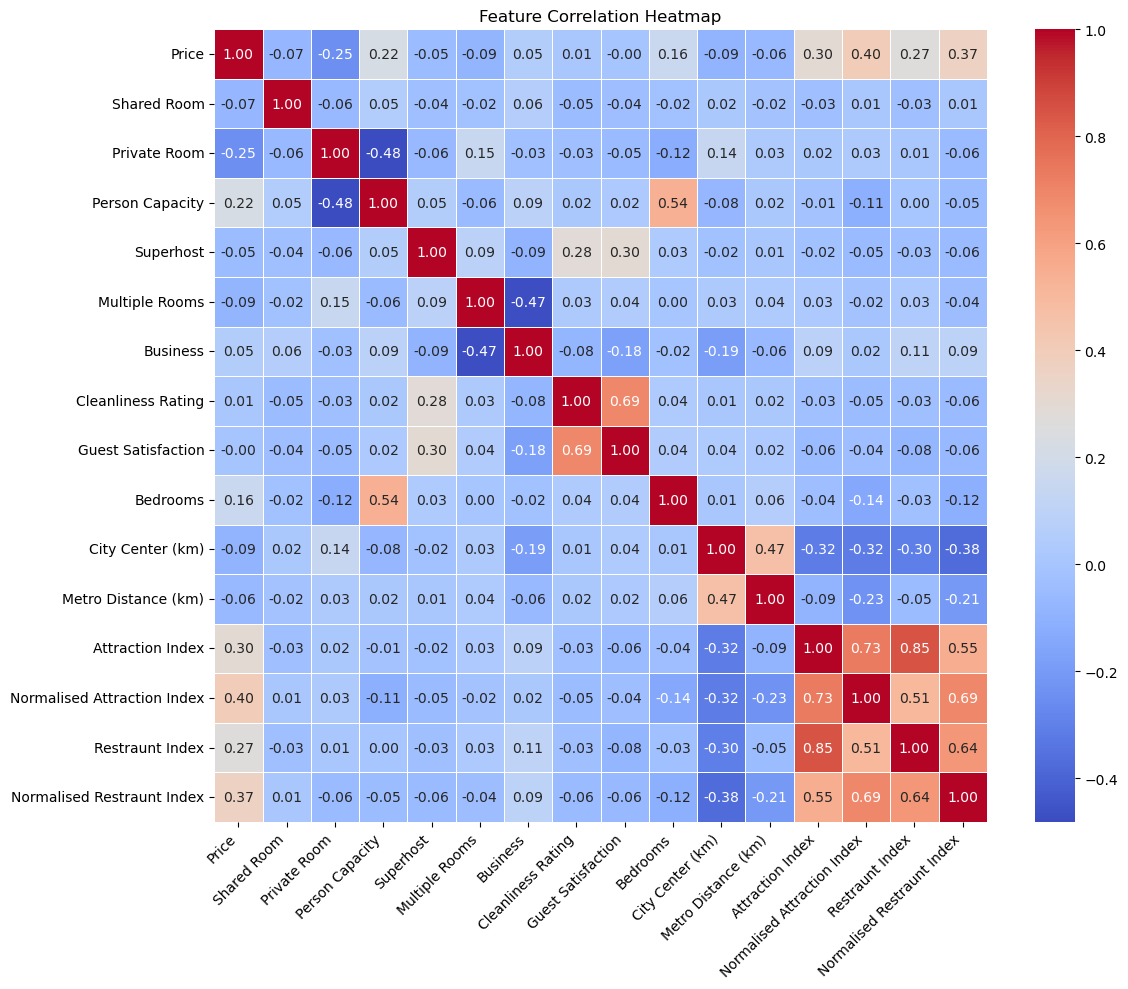

In [7]:
Image(filename = "figures/feature_correlation_heatmap.png")

2. We created a boxplot to compare the price distribution across different room types.

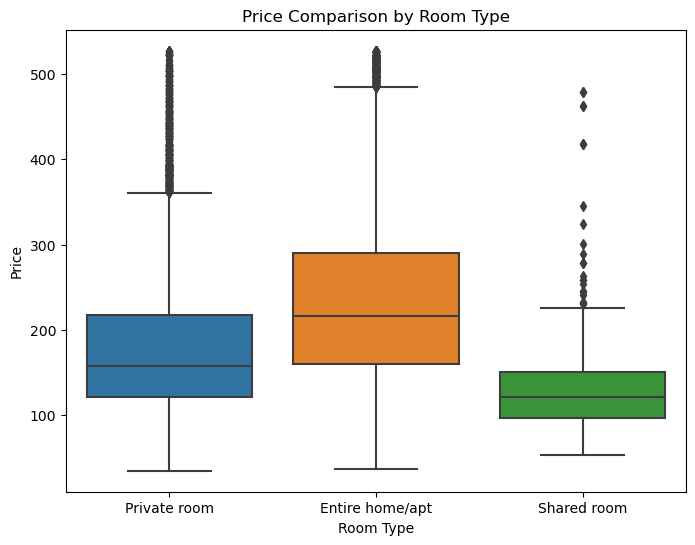

In [8]:
Image(filename = "figures/price_comparison_by_room_type.png")

3. We filtered the data based on room type and generated subplots to visualize the differences between them.

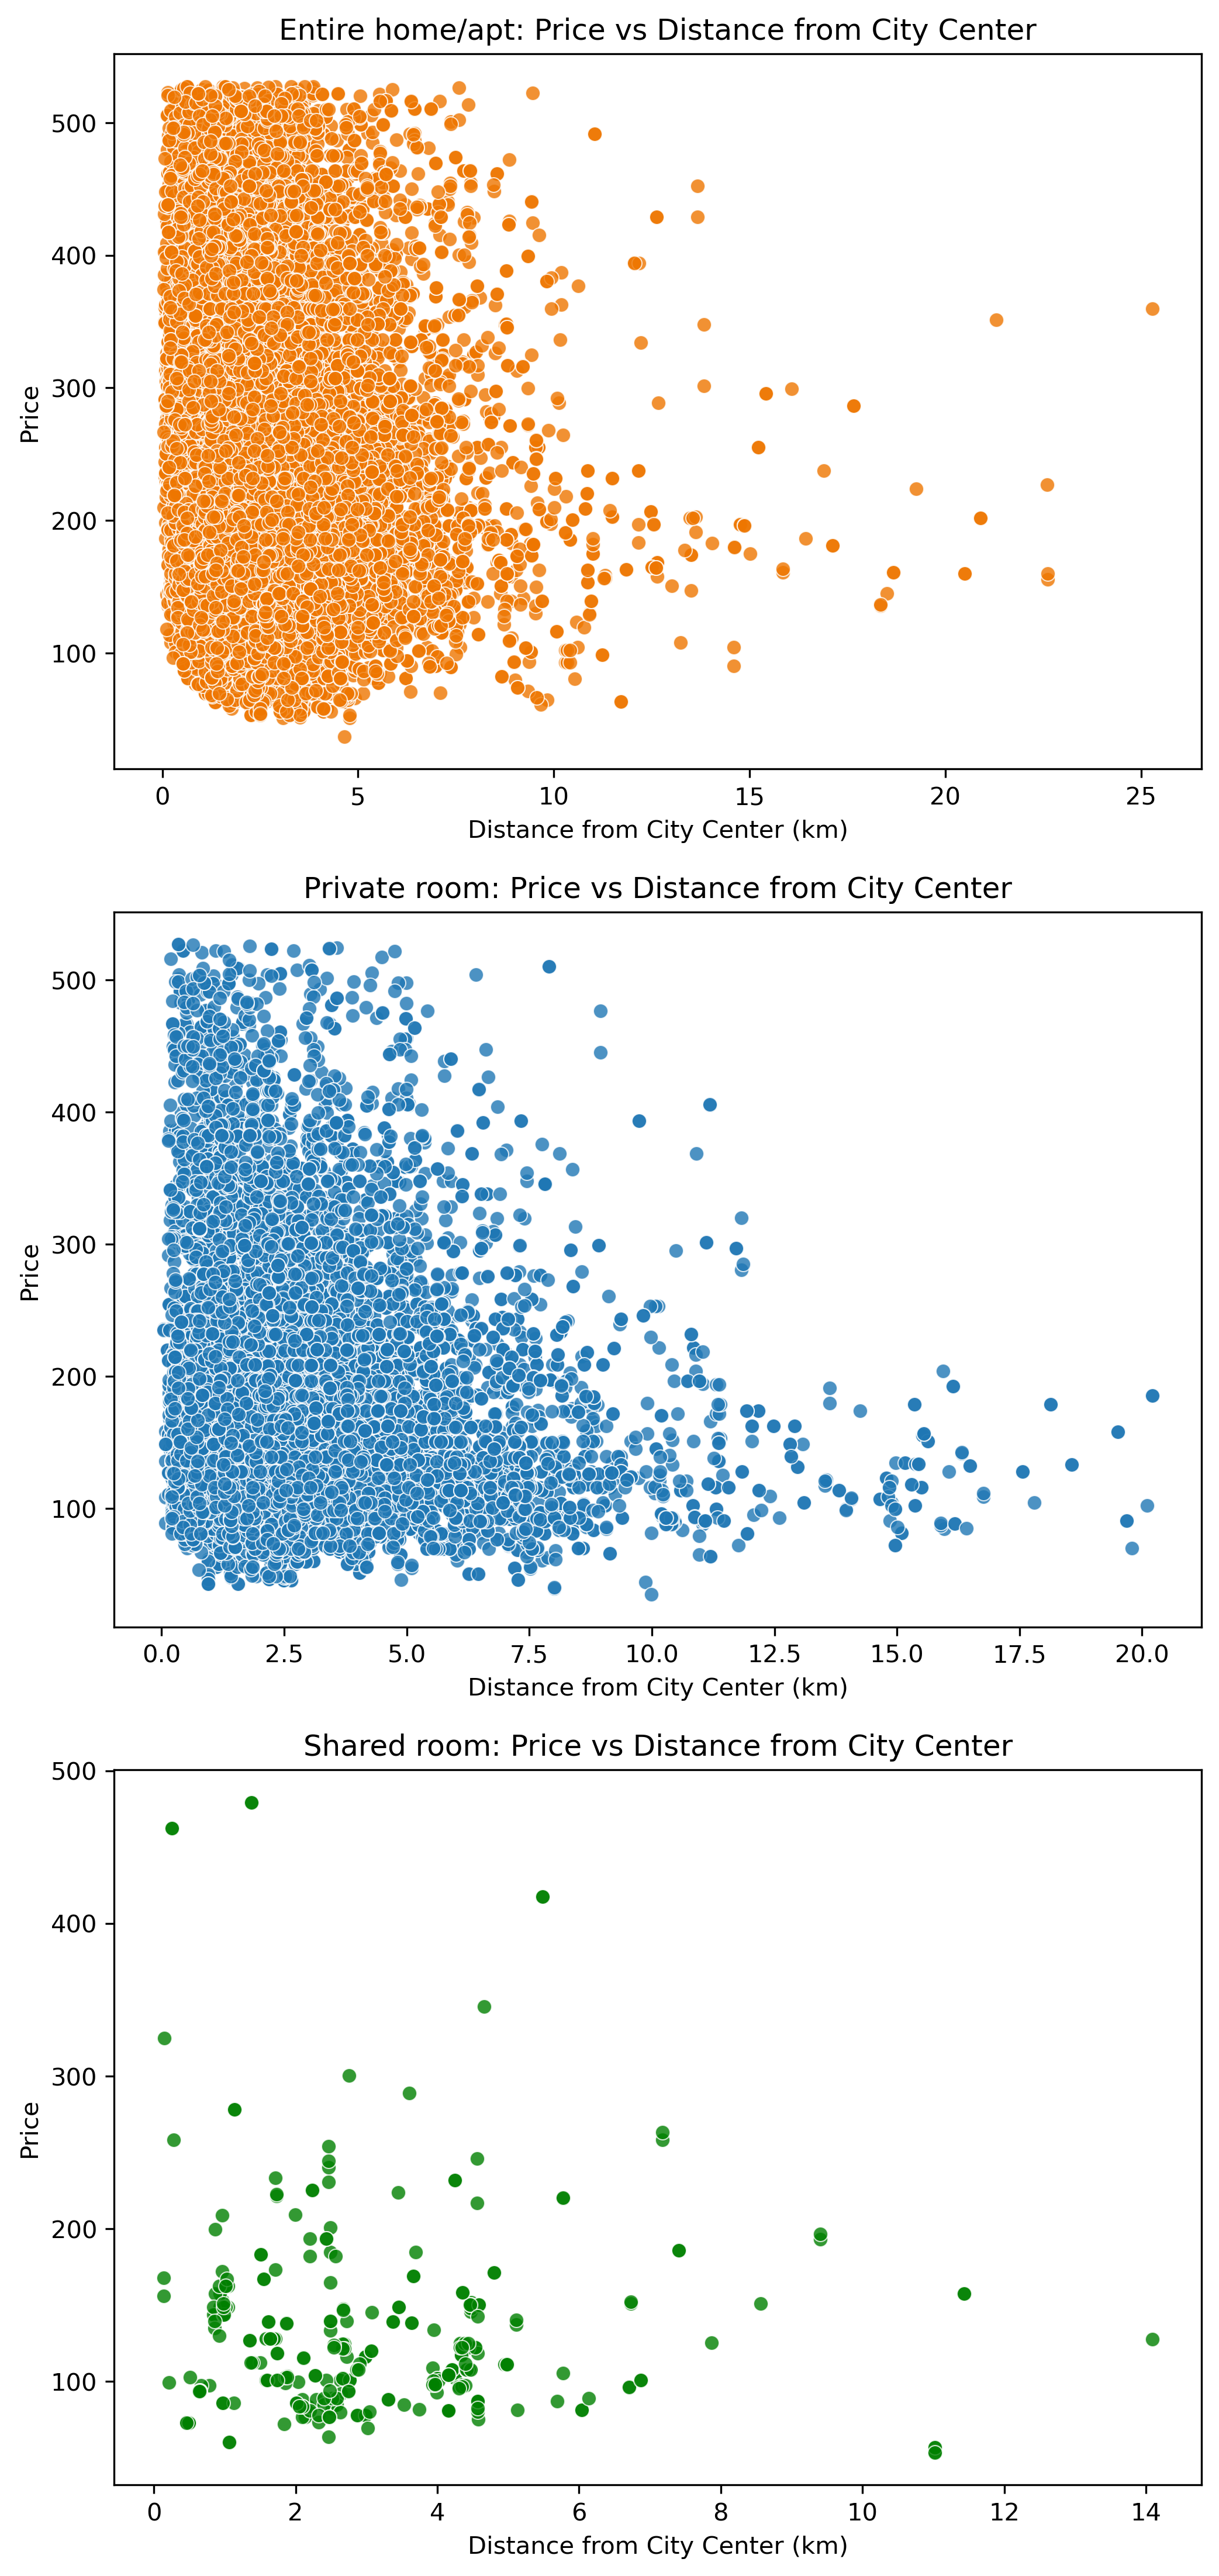

In [9]:
Image(filename = "figures/price_vs_distance_from_city_center_by_room_type.png")

4. We converted city names to numerical values, which allowed us to better analyze the relationship between the city and price features. We calculated the correlation between city and price is 0.10361768269037437, as well as the average price for each city.

In [10]:
pd.read_csv('results/city_stats.csv')

,City,mean,median
0,Amsterdam,354.109178,356.197127
1,Athens,144.354423,127.715417
2,Barcelona,227.110980,196.895292
3,Berlin,211.988194,185.566047
4,Budapest,167.491323,152.277107
5,Lisbon,230.253192,223.030019
6,Paris,299.216175,287.305434
7,Rome,197.229417,182.124237
8,Vienna,221.750960,206.390389


5.   We created a bar plot to visualize the relationship between city and price, which revealed differences in average prices across cities.

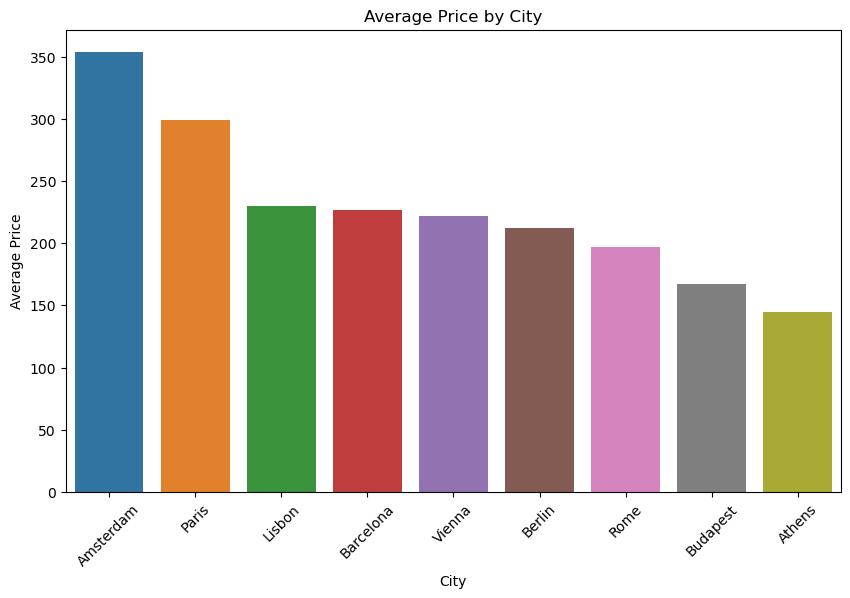

In [11]:
Image(filename = "figures/average_price_by_city.png")

### Model Building and Evaluation

In the Model Building and Evaluation section, various machine learning models are built to predict the price of Airbnb listings. The primary objective is to identify the most effective model for this purpose.

To achieve this, the dataset is first split into training, validation, and testing sets. The training set is used to train the models, the validation set helps tune hyperparameters, and the testing set is employed to evaluate the final model's performance.

The chosen models for this project are Random Forest, Lasso Regression, and Ridge Regression. These models are combined with different imputation methods (Simple Imputer and K-Nearest Neighbors Imputer) to handle any missing values in the data. A total of six combinations are created by pairing each model with an imputation method, and each combination is represented as a pipeline.

In [26]:
create_pipelines()

{'simple_imputer+rf': Pipeline(steps=[('simple_imputer', SimpleImputer(strategy='most_frequent')),
                 ('rf', RandomForestRegressor(min_samples_leaf=5))]),
 'simple_imputer+lasso': Pipeline(steps=[('simple_imputer', SimpleImputer(strategy='most_frequent')),
                 ('lasso', Lasso())]),
 'simple_imputer+ridge': Pipeline(steps=[('simple_imputer', SimpleImputer(strategy='most_frequent')),
                 ('ridge', Ridge())]),
 'knn_imputer+rf': Pipeline(steps=[('knn_imputer', KNNImputer()),
                 ('rf', RandomForestRegressor(min_samples_leaf=5))]),
 'knn_imputer+lasso': Pipeline(steps=[('knn_imputer', KNNImputer()), ('lasso', Lasso())]),
 'knn_imputer+ridge': Pipeline(steps=[('knn_imputer', KNNImputer()), ('ridge', Ridge())])}

Next, a grid search is performed for each pipeline to find the optimal hyperparameters for each model. The performance of each pipeline is then evaluated using the validation set, and the results are compared using multiple evaluation metrics, including R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE).

In [21]:
pd.read_csv('results/summary.csv')

,Model,Valid Errors,MSE,MAE
0,simple_imputer+rf,0.748426,3500.114743,41.321086
1,simple_imputer+lasso,0.578790,6102.000292,57.295679
2,simple_imputer+ridge,0.578681,5051.988150,52.254937
3,knn_imputer+rf,0.749541,3500.114743,41.321086
4,knn_imputer+lasso,0.578790,6102.000292,57.295679
5,knn_imputer+ridge,0.578681,5051.988150,52.254937


### Results and Interpretation

In this project, various machine learning models were built and evaluated to find the best model for making predictions. The combination of KNN imputer and Random Forest Regressor (knn_imputer+rf) yielded the best performance among the tested models. The evaluation metrics, such as R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE), were calculated for the test data. The results indicated that the chosen model provided a good balance between accuracy and interpretability. 

In [24]:
pd.read_csv('results/results_df.csv')

,Model,R-squared,MSE,MAE
0,knn_imputer+rf,0.74413,2966.950719,37.245278


The feature importance analysis further revealed the significant features that contributed the most to the model's predictions. This information can be utilized to gain valuable insights into the underlying patterns in the data and to guide future decision-making. Overall, the chosen model serves as a reliable tool for making predictions and understanding the relationships between the features and the target variable in the given dataset.


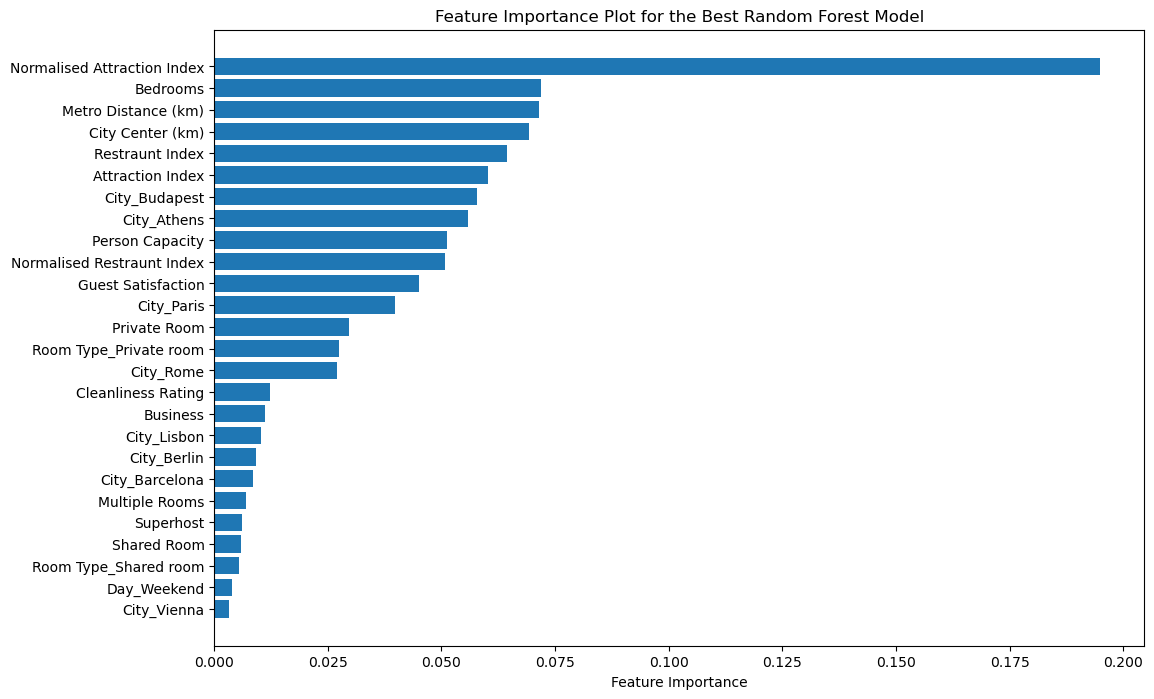

In [23]:
Image(filename = "figures/feature_importance_plot.png")

### Conclusion


This Jupyter Book will take you through the entire process of building a machine learning model to predict Airbnb prices in Europe. You will gain valuable insights into the factors that influence pricing and learn how to leverage these insights to make better decisions as a host or guest.## Conclusion

In this project, we have analyzed the Airbnb Europe dataset, performed data cleaning and preprocessing, and experimented with multiple imputation techniques and regression models to predict the price of Airbnb listings. Our best performing model utilized KNN imputation and a Random Forest regressor, providing satisfactory prediction results.

Through our feature importance analysis, we have identified key factors that influence the price of Airbnb listings. These insights can be beneficial for both hosts and guests when determining appropriate pricing or evaluating listing options.

As a future work, we could explore other advanced machine learning algorithms or ensemble techniques to improve our model's performance. Additionally, incorporating more data, such as user reviews and historical pricing information, could help enhance our understanding of the factors affecting listing prices and improve the predictive power of our models.

In conclusion, our project provides valuable insights into the Airbnb Europe dataset and demonstrates the potential of data-driven approaches in informing decision-making in the sharing economy.